### INFO284 Machine Learning Exam, spring 2024

#### Importing and versioncontrol for relevant libraries

In [1]:
import sys
print("Python version: {}".format(sys.version))
import pandas as pd
print("pandas version: {}".format(pd.__version__))
import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))
import numpy as np
print("NumPy version: {}".format(np.__version__))
import scipy as sp
print("SciPy version: {}".format(sp.__version__))
import IPython
print("IPython version: {}".format(IPython.__version__))
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))

Python version: 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]
pandas version: 2.1.1
matplotlib version: 3.7.2
NumPy version: 1.25.2
SciPy version: 1.11.2
IPython version: 8.12.0
scikit-learn version: 1.3.1


#### Notes
#correlation matrix
#chi square matrix
#r2 value accuracy
#Mlp
#deep learning pytorch
#scaling the data
#decicion treees - distribution - scaled data = good


It could be relevant to use principle component analysis and then use clustering to look for pattern and trends.

In [2]:
import pandas as pd
filePath = 'elektronisk-rapportering-ers-2018-fangstmelding-dca-simple.csv'
#keep in mind that the file is encoded in UTF-8, so it will only work if you have the correct version of pandas.
df = pd.read_csv(filePath, encoding="UTF-8" , delimiter=";")
df.head()

,Melding ID,Meldingstidspunkt,Meldingsdato,Meldingsklokkeslett,Starttidspunkt,Startdato,Startklokkeslett,Startposisjon bredde,Startposisjon lengde,Hovedområde start (kode),...,Art - FDIR,Art - gruppe (kode),Art - gruppe,Rundvekt,Lengdegruppe (kode),Lengdegruppe,Bruttotonnasje 1969,Bruttotonnasje annen,Bredde,Fartøylengde
0,1497177,01.01.2018,01.01.2018,00:00,31.12.2017,31.12.2017,00:00,"-60,35","-46,133",NaN,...,Antarktisk krill,506.0,Antarktisk krill,706714.0,5.0,28 m og over,9432.0,NaN,"19,87","133,88"
1,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,...,Hyse,202.0,Hyse,9594.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
2,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,...,Torsk,201.0,Torsk,8510.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
3,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,...,Blåkveite,301.0,Blåkveite,196.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"
4,1497178,01.01.2018,01.01.2018,00:00,30.12.2017 23:21,30.12.2017,23:21,"74,885","16,048",20.0,...,Sei,203.0,Sei,134.0,5.0,28 m og over,1476.0,NaN,"12,6","56,8"


In [3]:
# Using the same seed for testing purposes makes the results more comparable
seed = 32
#printing the unique values from column 'Hovedområde start'
print(df['Hovedområde start'].unique())
#the hovedområde stopp and hovedområde start is identical.

[nan 'Bjørnøya' 'Røstbanken til Malangsgrunnen' 'Sentralbanken'
 'Nordkappbanken' 'Shetland' 'Vikingbanken' 'Øst-Finnmark' 'Vest-Finnmark'
 'Kaninbanken' 'Skolpenbanken' 'Skagerrak' 'Eigersundbanken'
 'Storegga-Frøyabanken' 'Vestfjorden (Lofoten)' 'Gåsebanken'
 'Thor Iversens Bank' 'Helgelandsbanken' 'Sørvest av Spitsbergen'
 'Vest av Skottland (Hebridene)' 'Vestlige Norskehav' 'Østlige Norskehav'
 'Øst av Færøyene' 'Storbanken' 'Hopen' 'Sentrale Nordsjø'
 'Sørlige Nordsjø' 'Murmanskkysten' 'Sørvestlige Norskehav'
 'Nordøst av Island' 'Sørlige Norskehav' 'Vest av Tromsøflaket'
 'Nord av Island' 'Vest av Irland' 'Sørvest av Island' 'Øst av Island'
 'Rockall' 'Admiralityfeltet' 'Britvinfeltet' 'Sørvest av Irland'
 'Skjoldungen' 'Danmarkstredet' 'Færøybanken' 'Vest av Færøyene'
 'Flemish Cap' 'Vest-Spitsbergen' 'Nordv.- Spitsbergen'
 'Storfjord/Hinlopenstredet' 'Nordøstområdet' 'Nord av Horn  (Island)'
 'Sør for Jan Mayen' 'Sentrale Norskehav' 'Nordvestlige Norskehav'
 'Grønlandshavet' 'F

In [4]:
# Excluding irrelevant columns

# Fangstår has only 2 unique values
df.drop(columns = ['Fangstår'], inplace= True)

# Lengdegruppe (kode), Lengdegruppe, Bruttotonnasje 1969, Bruttotonnasje annen, Bredde, Fartøylengde all seem to be speaking of the boat doing the catching, with few unique values in each column.
# One of them should be kept as a feature, the rest discarded. We would suggest the most relevant to be Bruttotonasje, which speaks to how much cargo space there is.
# "Bruttotonnasje 1969" and "Bruttotonnasje annen" seem to have nan where the other one has a value, so first we will collapse them into one.
df['Bruttotonnasje'] = df['Bruttotonnasje annen'].combine_first(df['Bruttotonnasje 1969'])
df.drop(columns=['Bruttotonnasje annen', "Bruttotonnasje 1969","Lengdegruppe (kode)", "Lengdegruppe", "Bredde", "Fartøylengde"], inplace=True)

# All columns (kode) in them are cateogrical code representations of another column. For human-readability and to avoid mistaking the code for a continuous value we will remove them.
df.drop(columns=["Hovedområde start (kode)", "Lokasjon start (kode)", "Hovedområde stopp (kode)", "Lokasjon stopp (kode)", "Redskap FAO (kode)", "Redskap FDIR (kode)", "Hovedart FAO (kode)", "Hovedart - FDIR (kode)", "Art FAO (kode)", "Art - FDIR (kode)", "Art - gruppe (kode)", ], inplace = True)

# In both the "Redskap" and "Art" columns you have FAO and FDIR abbriviations. FAO = Food and Agriculture Organization of the United Nations and FDIR = Fiskeridirektoratet
# Due to "Hovedart" only having FAO uncoded we will stick to FAO. For the same reason we will remove "Art - gruppe"
df.drop(columns=["Art - gruppe", "Art - FDIR", "Redskap FDIR"], inplace=True)

# While time of day and date might be relevant we don't need all of them and we don't need to know when it was reported in. For now we will leave start/end date and time.
df.drop(columns=["Meldingstidspunkt", "Meldingsdato", "Meldingsklokkeslett", "Starttidspunkt", "Stopptidspunkt"], inplace=True)

# The areas where they start and stop have 6 columns. A pair of coordiantes and name of area x2. Since we prefer the continuous features and coordinates=name of place we are removing the name.
df.drop(columns=["Hovedområde stopp"], inplace=True)

In [5]:
# After having checked to see what % of each column had nan values we decided just to drop them as at worst they were around 1.6 %
df = df.dropna()

In [6]:
# Focusing down on the species we want to investigate
# More might be added later as categories or ranges
df = df[df['Art FAO'].isin(['Torsk', 'Sei', 'Hyse'])]

In [7]:
# Removing parts of columns

# From varighet we remove anyting above 400 as according to lecturer that is in the high range of how long you would be fishing in a session.
# So we will consider them outliers or multiple sessions reported as one and exclude them for now.

df = df[df['Varighet'] <= 400]

# Maybe remove some outliers from "Trekkavstand". Above 50000 the frequency gets 100 instances per 5000 length.
# Just doing it for now, unsure of necessity
df = df[df['Trekkavstand'] <= 50000]

In [8]:
# Manipulating columns

# The coordinates are strings, here I'm changing them to int so they're easier to use.
# Later we might potentially change them in a different way.
df['Startposisjon bredde'] = df['Startposisjon bredde'].str.replace(',', '').astype(int)
df['Startposisjon lengde'] = df['Startposisjon lengde'].str.replace(',', '').astype(int)
df['Stopposisjon bredde'] = df['Stopposisjon bredde'].str.replace(',', '').astype(int)
df['Stopposisjon lengde'] = df['Stopposisjon lengde'].str.replace(',', '').astype(int)

# Date/time could potentially be changed to month/hour?
# df['Startmåned'] = df['Startdato'].astype(str).str[3:5]
# df['Starttime'] = df['Startklokkeslett'].astype(str).str[3:5]
# df['Stoppmåned'] = df['Stoppdato'].astype(str).str[3:5]
# df['Stopptime'] = df['Stoppklokkeslett'].astype(str).str[3:5]
# df.drop(columns=['Startdato', "Startklokkeslett", "Stoppdato", "Stoppklokkeslett"], inplace=True)

# Many of the sea depth notations are positiv, which doesn't make sense.
# But the amount of them in relation to number of entries means it can't be discounted as an error
# In the lecture on fisheries it was mentioned that a lot fo these are inputed manually
# And that most of these non-sensical sea depths are actually correct, just lacking a minus.
# Therefore we are simply flipping all the positive sea depth into negatives.
df['Havdybde start'] = -df['Havdybde start'].abs()
df['Havdybde stopp'] = -df['Havdybde stopp'].abs()

In [9]:
# Pivoting table

# Pivoting table so rows that are information about the same session are put together
df = df.pivot_table(index=['Melding ID', 'Startdato', 'Startklokkeslett', 'Startposisjon bredde', 'Startposisjon lengde', 'Havdybde start', 'Stoppdato', 'Stoppklokkeslett', 'Varighet', 'Stopposisjon bredde', 'Stopposisjon lengde', 'Havdybde stopp', 'Trekkavstand', 'Redskap FAO', 'Hovedart FAO','Bruttotonnasje', 'Hovedområde start'], columns='Art FAO', values='Rundvekt', aggfunc='sum').reset_index()

# This creates a lot of nan values which we fill with 0
df = df.fillna(0)

# We add another column to indicate which was the dominant catch during that session
# Might be removed or deemed redunadant later on as it has a 86% match to "Hovedfangst FAO"
df['Hovedfangst'] = df[['Hyse', 'Sei', 'Torsk']].idxmax(axis=1)

print(f"After pre-processing the dataset has {df.shape[1]} columns and {df.shape[0]} rows")
df.head()

After pre-processing the dataset has 21 columns and 50696 rows


Art FAO,Melding ID,Startdato,Startklokkeslett,Startposisjon bredde,Startposisjon lengde,Havdybde start,Stoppdato,Stoppklokkeslett,Varighet,Stopposisjon bredde,...,Havdybde stopp,Trekkavstand,Redskap FAO,Hovedart FAO,Bruttotonnasje,Hovedområde start,Hyse,Sei,Torsk,Hovedfangst
0,1497178,30.12.2017,23:21,74885,16048,-335,31.12.2017,04:16,295,74914,...,-334,3970.0,"Bunntrål, otter",Hyse,1476.0,Bjørnøya,9594.0,134.0,8510.0,Hyse
1,1497178,31.12.2017,05:48,7491,15868,-403,31.12.2017,10:15,267,74901,...,-277,11096.0,"Bunntrål, otter",Hyse,1476.0,Bjørnøya,9118.0,67.0,6651.0,Hyse
2,1497178,31.12.2017,11:34,74883,16056,-346,31.12.2017,16:49,315,74924,...,-496,10215.0,"Bunntrål, otter",Hyse,1476.0,Bjørnøya,12432.0,68.0,5097.0,Hyse
3,1497178,31.12.2017,17:44,74931,15785,-443,31.12.2017,21:47,243,74926,...,-358,3214.0,"Bunntrål, otter",Torsk,1476.0,Bjørnøya,6758.0,0.0,7022.0,Torsk
4,1497229,01.01.2018,10:01,67828,12972,-71,01.01.2018,11:04,63,67827,...,-56,1269.0,Snurrevad,Hyse,51.0,Røstbanken til Malangsgrunnen,4.0,0.0,0.0,Hyse


In [10]:
#counting number of rows
# print("Number of rows: ", df.shape[0])
#realising that i havent dropped any rows since the number of rows are still the same
# df.dropna(inplace=True)
# print("New number of rows: ", df.shape[0])
#actually gonna drop all rows other than torsk, sei, hyse. Since we are only interested in these three species. The other are underrepresented and not relevant for our analysis.
# df = df[df['Art - gruppe'].isin(['Torsk', 'Sei', 'Hyse', 'Annen flatfisk, bunnfisk og dypvannsfisk'])]
# print("Only focusing on torsk sei hyse and Annen flatfisk, bunnfisk og dypvannsfisk: ", df.shape[0])
# df.head()
#so now we are working with %{df}.


#deciding to one hot encode the Hovedområde start values to also include them in the correlation matrix
df = pd.get_dummies(df, columns=['Hovedområde start'])
df.head()


,Melding ID,Startdato,Startklokkeslett,Startposisjon bredde,Startposisjon lengde,Havdybde start,Stoppdato,Stoppklokkeslett,Varighet,Stopposisjon bredde,...,Hovedområde start_Vest av Skottland (Hebridene),Hovedområde start_Vest av Tromsøflaket,Hovedområde start_Vest-Finnmark,Hovedområde start_Vest-Spitsbergen,Hovedområde start_Vestfjorden (Lofoten),Hovedområde start_Vestlige Norskehav,Hovedområde start_Vikingbanken,Hovedområde start_Øst av Færøyene,Hovedområde start_Øst-Finnmark,Hovedområde start_Østlige Norskehav
0,1497178,30.12.2017,23:21,74885,16048,-335,31.12.2017,04:16,295,74914,...,False,False,False,False,False,False,False,False,False,False
1,1497178,31.12.2017,05:48,7491,15868,-403,31.12.2017,10:15,267,74901,...,False,False,False,False,False,False,False,False,False,False
2,1497178,31.12.2017,11:34,74883,16056,-346,31.12.2017,16:49,315,74924,...,False,False,False,False,False,False,False,False,False,False
3,1497178,31.12.2017,17:44,74931,15785,-443,31.12.2017,21:47,243,74926,...,False,False,False,False,False,False,False,False,False,False
4,1497229,01.01.2018,10:01,67828,12972,-71,01.01.2018,11:04,63,67827,...,False,False,False,False,False,False,False,False,False,False


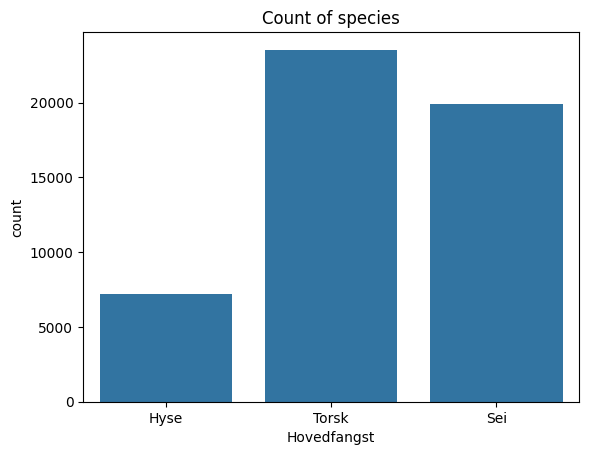

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#presenting the count of the different species in the dataset with a barplot
sns.countplot(x='Hovedfangst', data=df)
plt.title('Count of species')
plt.show() #there is a big difference in the count of Hyse compared to the rest. Would perhaps be better to use Gruppe - Art for more even distribution

#### Visual exploring of data

<Axes: xlabel='Havdybde start', ylabel='Havdybde stopp'>

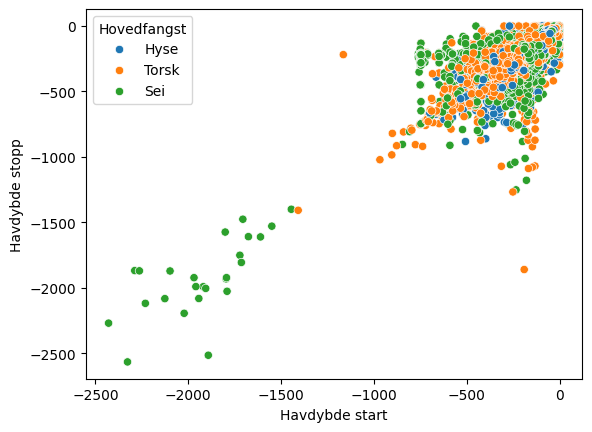

In [12]:
#plotting havdybde start and havdybde stopp using seaborn with different color for each species
sns.scatterplot(x='Havdybde start', y='Havdybde stopp', data=df, hue='Hovedfangst')
#viewing the plot and seeing it is so dense that it is hard to see the differences between the species. Additionally there are a lot of species over 0 which does not make sense when fishing.

#maybe we should use a threshold for the depth, since it is not possible to fish at 0 depth?
#then we will loose a lot of data points, so maybe there is a way to transform the outliers?
#But then again the transformed outliers will be useless since the initial values are not reliable? Are depth feature even reliable?
#note: Should probably transform the Art-gruppe to numerical values with one hot encoding.

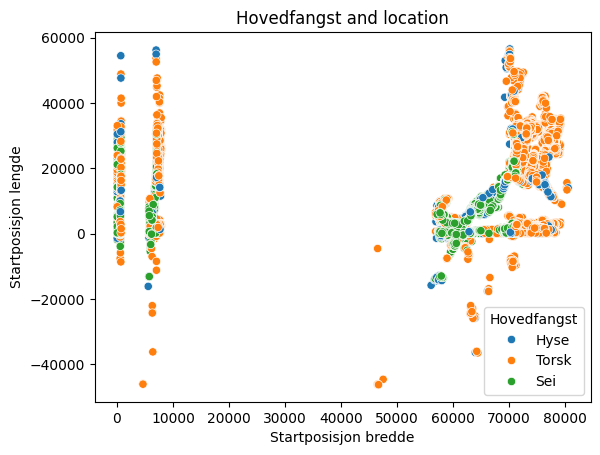

In [14]:
#plotting fish species and location
sns.scatterplot(x='Startposisjon bredde', y='Startposisjon lengde', data=df, hue='Hovedfangst')
plt.title('Hovedfangst and location')
plt.show()

#only problem is that the coordinates are just numbers, so it is hard to see where the coordinates are.

In [15]:
#listing all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50696 entries, 0 to 50695
Data columns (total 61 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Melding ID                                       50696 non-null  int64  
 1   Startdato                                        50696 non-null  object 
 2   Startklokkeslett                                 50696 non-null  object 
 3   Startposisjon bredde                             50696 non-null  int32  
 4   Startposisjon lengde                             50696 non-null  int32  
 5   Havdybde start                                   50696 non-null  int64  
 6   Stoppdato                                        50696 non-null  object 
 7   Stoppklokkeslett                                 50696 non-null  object 
 8   Varighet                                         50696 non-null  int64  
 9   Stopposisjon bredde         

#### Exploring matrix correlations

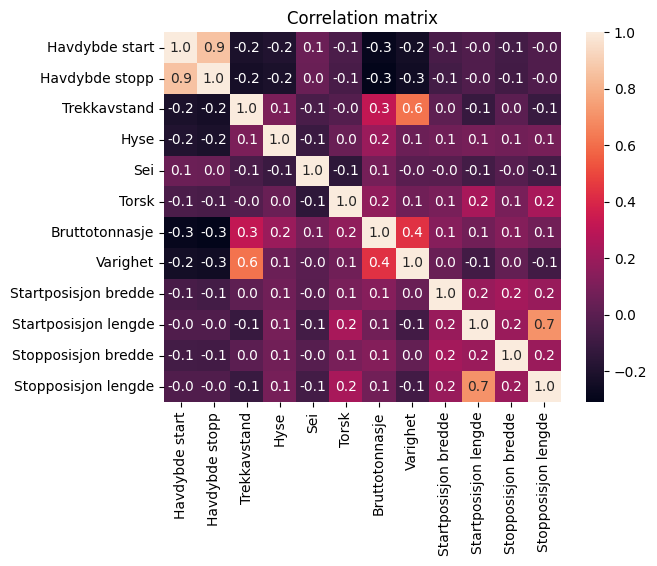

In [16]:
#trying correlation matrix
#defining a correlation matrix version of the dataframe with only the columns with numerical values
df_corr = df[['Havdybde start', 'Havdybde stopp', 'Trekkavstand', 'Hyse', 'Sei', 'Torsk', 'Bruttotonnasje', 'Varighet', 'Startposisjon bredde', 'Startposisjon lengde', 'Stopposisjon bredde', 'Stopposisjon lengde']]

#plotting the correlation matrix
sns.heatmap(df_corr.corr(), annot=True, fmt=".1f" )  #.1ft for using one decimal
plt.title('Correlation matrix')
plt.show() #the correlation matrix does not really tell us any strong relationships between features. The non-linear relationships could still be useful for the model though.

Text(0.5, 1.0, 'Correlation matrix of one hot encoded columns with species')

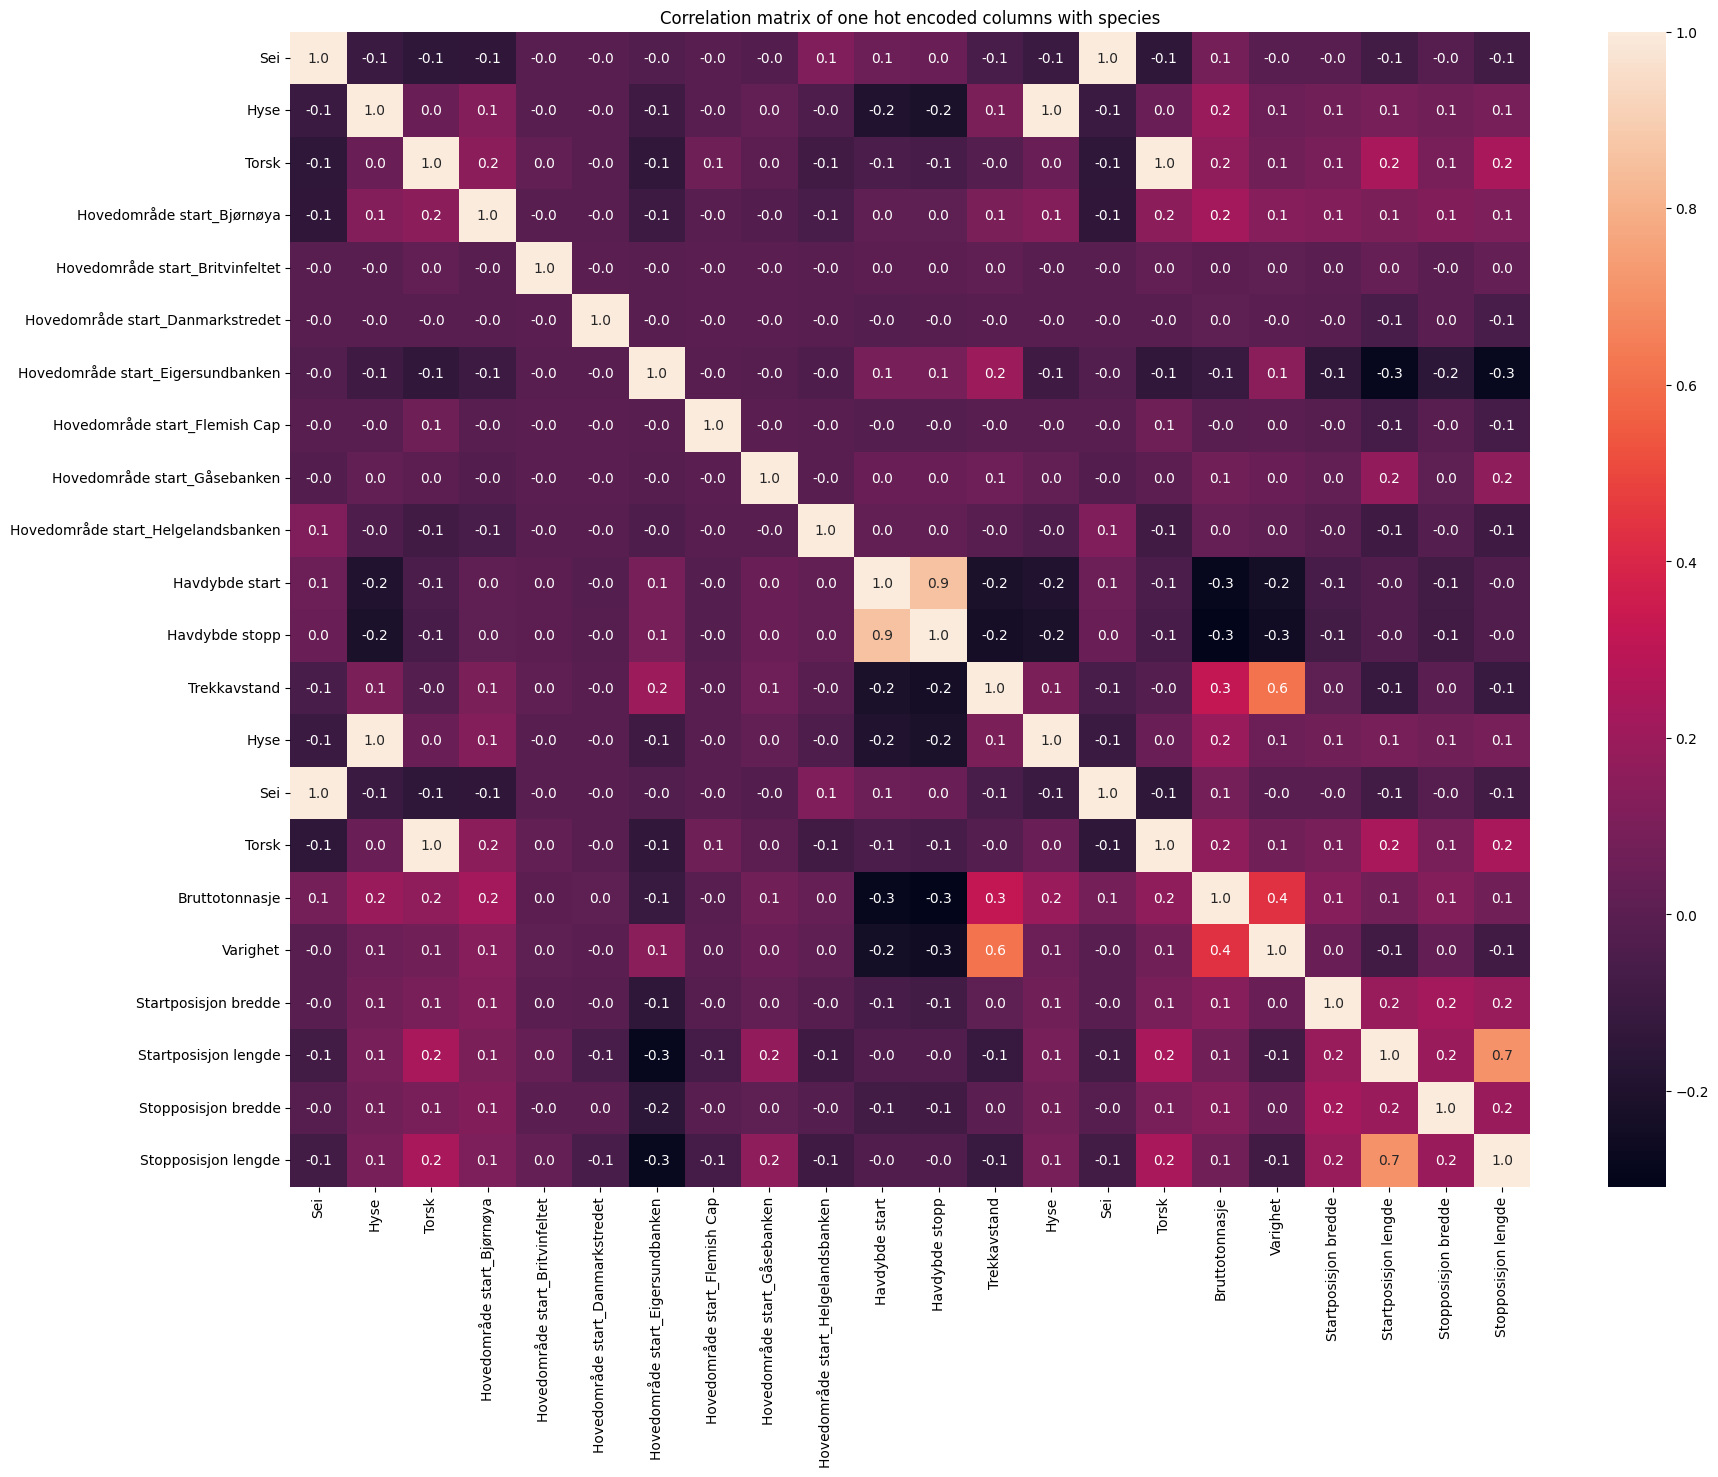

In [17]:
#creating a correlation matrix of all the one hot encoded columns and sei hyse torsk
''' Hovedområde start_Admiralityfeltet                50696 non-null  bool   
 21  Hovedområde start_Bjørnøya                       50696 non-null  bool   
 22  Hovedområde start_Britvinfeltet                  50696 non-null  bool   
 23  Hovedområde start_Danmarkstredet                 50696 non-null  bool   
 24  Hovedområde start_Eigersundbanken                50696 non-null  bool   
 25  Hovedområde start_Flemish Cap                    50696 non-null  bool   
 26  Hovedområde start_Gåsebanken                     50696 non-null  bool   
 27  Hovedområde start_Helgelandsbanken               50696 non-null  bool   
 28  Hovedområde start_Hopen                          50696 non-null  bool   
 29  Hovedområde start_Kaninbanken                    50696 non-null  bool   
 30  Hovedområde start_Murmanskkysten                 50696 non-null  bool   
 31  Hovedområde start_Nordkappbanken                 50696 non-null  bool   
 32  Hovedområde start_Nordv.- Spitsbergen            50696 non-null  bool   
 33  Hovedområde start_Nordvestlige Norskehav         50696 non-null  bool   
 34  Hovedområde start_Nordøst av Island              50696 non-null  bool   
 35  Hovedområde start_Nordøstområdet                 50696 non-null  bool   
 36  Hovedområde start_Rockall                        50696 non-null  bool   
 37  Hovedområde start_Røstbanken til Malangsgrunnen  50696 non-null  bool   
 38  Hovedområde start_Sentralbanken                  50696 non-null  bool   
 39  Hovedområde start_Sentrale Nordsjø               50696 non-null  bool   
 40  Hovedområde start_Shetland                       50696 non-null  bool   
 41  Hovedområde start_Skagerrak                      50696 non-null  bool   
 42  Hovedområde start_Skolpenbanken                  50696 non-null  bool   
 43  Hovedområde start_Storbanken                     50696 non-null  bool   
 44  Hovedområde start_Storegga-Frøyabanken           50696 non-null  bool   
 45  Hovedområde start_Storfjord/Hinlopenstredet      50696 non-null  bool   
 46  Hovedområde start_Sør for Jan Mayen              50696 non-null  bool   
 47  Hovedområde start_Sørlige Norskehav              50696 non-null  bool   
 48  Hovedområde start_Sørvest av Island              50696 non-null  bool   
 49  Hovedområde start_Sørvest av Spitsbergen         50696 non-null  bool   
 50  Hovedområde start_Thor Iversens Bank             50696 non-null  bool   
 51  Hovedområde start_Vest av Skottland (Hebridene)  50696 non-null  bool   
 52  Hovedområde start_Vest av Tromsøflaket           50696 non-null  bool   
 53  Hovedområde start_Vest-Finnmark                  50696 non-null  bool   
 54  Hovedområde start_Vest-Spitsbergen               50696 non-null  bool   
 55  Hovedområde start_Vestfjorden (Lofoten)          50696 non-null  bool   
 56  Hovedområde start_Vestlige Norskehav             50696 non-null  bool   
 57  Hovedområde start_Vikingbanken                   50696 non-null  bool   
 58  Hovedområde start_Øst av Færøyene                50696 non-null  bool   
 59  Hovedområde start_Øst-Finnmark                   50696 non-null  bool   
 60  Hovedområde start_Østlige Norskehav              50696 non-null  bool  '''
#correlation matrix for 10 locations at a time
plt.figure(figsize=(20, 15))  # Adjust the dimensions as needed to fit your data
df_corr = df[['Sei', 'Hyse', 'Torsk', 'Hovedområde start_Bjørnøya', 'Hovedområde start_Britvinfeltet', 'Hovedområde start_Danmarkstredet', 'Hovedområde start_Eigersundbanken', 'Hovedområde start_Flemish Cap', 'Hovedområde start_Gåsebanken', 'Hovedområde start_Helgelandsbanken', 'Havdybde start', 'Havdybde stopp', 'Trekkavstand', 'Hyse', 'Sei', 'Torsk', 'Bruttotonnasje', 'Varighet', 'Startposisjon bredde', 'Startposisjon lengde', 'Stopposisjon bredde', 'Stopposisjon lengde',]]
sns.heatmap(df_corr.corr(), annot=True, fmt=".1f" )  #.1ft for using one decimal
plt.title('Correlation matrix of one hot encoded columns with species')

#tried to look for correlation in the location and species, but it is not showing any strong correlation. 

#### How will we calculate the non-linear values in the correlation matrix?